# Relax Data Science Challenge

In [174]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [175]:
#load data
df_engage = pd.read_csv('takehome_user_engagement.csv')
df_users = pd.read_csv('takehome_users.csv',encoding='latin-1')

In [176]:
#Examine datasets
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [177]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [178]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [179]:
#Change dates to datetime objects
time_format = '%Y-%m-%d %H:%M:%S'
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'], format=time_format)
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'], format=time_format)

In [180]:
df_engage.set_index('time_stamp', inplace = True)

In [181]:
df_engage.head(15)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2,1


In [182]:
df_weekly = df_engage.groupby('user_id').resample('1W').sum()

In [183]:
df_weekly = df_weekly[df_weekly['user_id'].isnull()==False].drop('user_id',axis=1)

In [184]:
df_weekly.head(15)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0
        2013-12-15        1
        2013-12-22        0
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-01-19        0
        2014-01-26        0
        2014-02-02        0
        2014-02-09        3
        2014-02-16        2

In [185]:
#Returns 1 if user has adopted the website and 0 if not
def has_adopted(row):
    if row >= 3:
        return 1
    else:
        return 0

In [186]:
#Add column that shows whether a user was active that week
df_weekly['has_adopted'] = df_weekly['visited'].apply(has_adopted)

In [187]:
df_weekly.head(15)

visited  has_adopted
user_id time_stamp                      
1       2014-04-27        1            0
2       2013-11-17        1            0
        2013-11-24        0            0
        2013-12-01        1            0
        2013-12-08        0            0
        2013-12-15        1            0
        2013-12-22        0            0
        2013-12-29        1            0
        2014-01-05        1            0
        2014-01-12        1            0
        2014-01-19        0            0
        2014-01-26        0            0
        2014-02-02        0            0
        2014-02-09        3            1
        2014-02-16        2            0

In [188]:
#Get the average number of weeks a user visits the site and the average number of weeks a user visits the site three times
df_weeks = df_weekly.groupby(level=0).agg(lambda x:x.value_counts().index[0])

In [189]:
df_weeks.head(15)

,visited,has_adopted
user_id,,
1,1,0
2,0,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
10,3,1
11,1,0


In [190]:
df_merge = pd.merge(df_weeks, df_users, left_index= True, right_on='object_id')

In [191]:
df_merge.head()

,visited,has_adopted,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,0,0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,1,0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,1,0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,1,0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [192]:
label = df_merge['has_adopted']

In [193]:
features = pd.get_dummies(df_merge, columns = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'creation_source'])

In [194]:
features.head()

,visited,has_adopted,object_id,creation_time,name,email,last_session_creation_time,org_id,invited_by_user_id,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,11,10803.0,0,1,1,0,1,0,0,0,0
1,0,0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,1,316.0,1,0,1,0,0,1,0,0,0
2,1,0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,94,1525.0,1,0,1,0,0,1,0,0,0
3,1,0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,1,5151.0,1,0,1,0,1,0,0,0,0
4,1,0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,193,5240.0,1,0,1,0,1,0,0,0,0


In [195]:
features.drop('visited', axis=1, inplace=True)

In [196]:
features.drop('has_adopted', axis=1, inplace=True)
features.drop('object_id', axis=1, inplace=True)
features.drop('creation_time', axis=1, inplace=True)
features.drop('name', axis=1, inplace=True)
features.drop('email', axis=1, inplace=True)
features.drop('last_session_creation_time', axis=1, inplace=True)
features.drop('org_id', axis=1, inplace=True)
features.drop('invited_by_user_id', axis=1, inplace=True)

In [197]:
features.head()

,opted_in_to_mailing_list_0,opted_in_to_mailing_list_1,enabled_for_marketing_drip_0,enabled_for_marketing_drip_1,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0,1,1,0,1,0,0,0,0
1,1,0,1,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,0
4,1,0,1,0,1,0,0,0,0


In [199]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [200]:
#Split dataset into train and test sets, create RandomForestClassifier, and train model#Split d 
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

#Create classifier
clf = GradientBoostingClassifier()

#Train the model
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [201]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.943709860219116


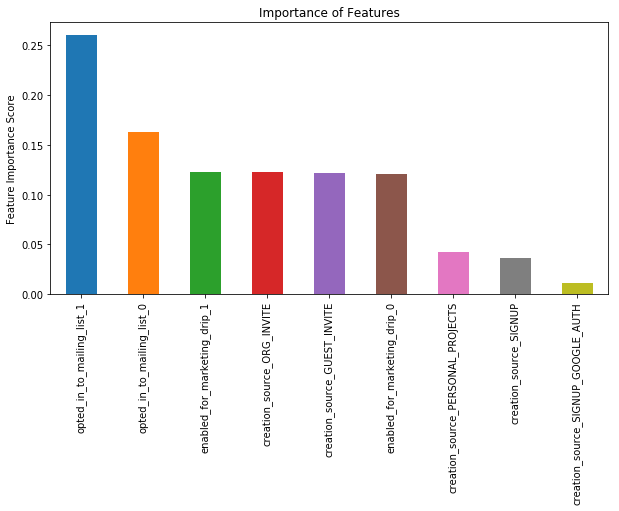

In [203]:
predictors = list(X_train)
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,5))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
pred=clf.predict(X_test)

From the graph above it seems that users who opt into the mailing lists are more likely to become adopted users. Creating promotions to encourage people to sign up to the mailing lists and creating interesting weekly mail may increase the adoption rate of users.